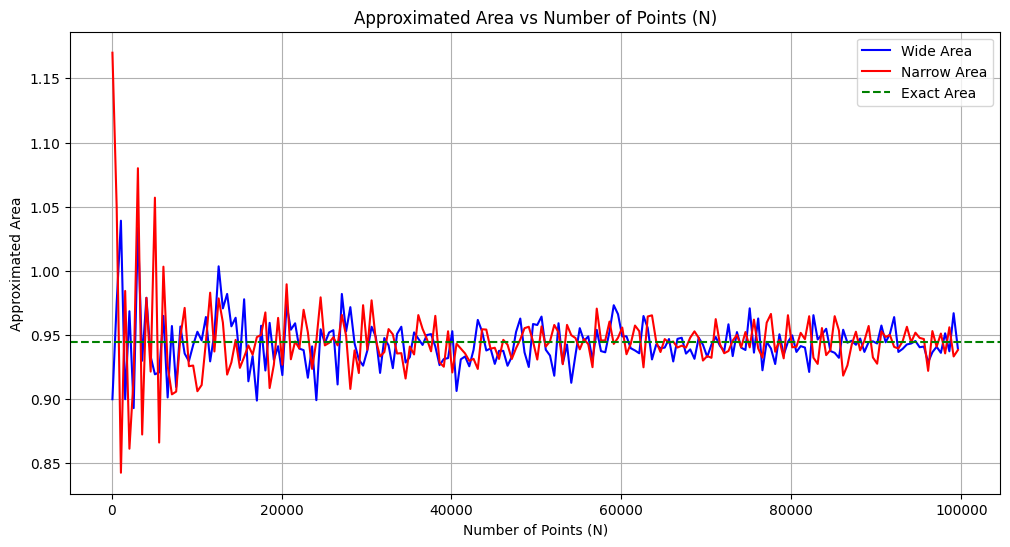

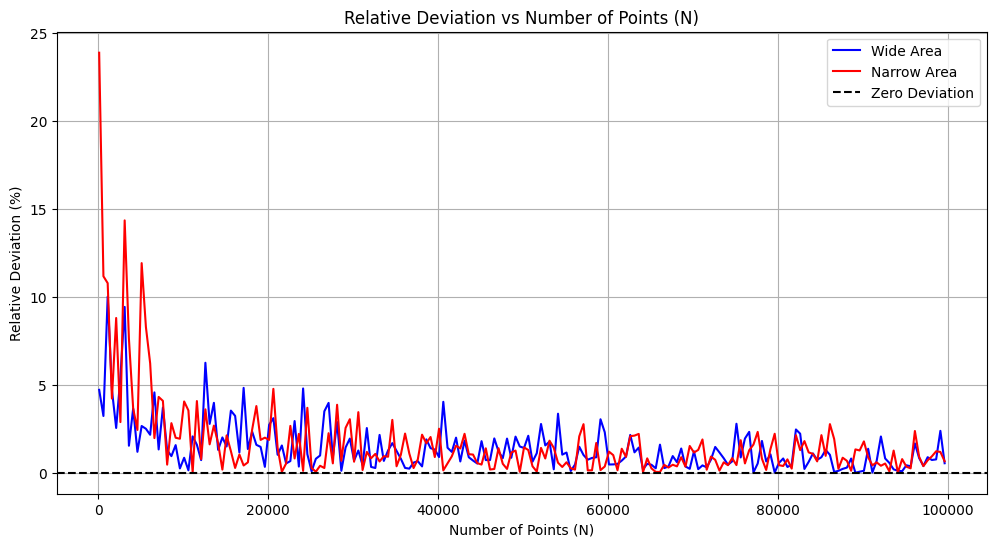

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

CIRCLES = [
    {"center": (1, 1), "radius": 1.0},
    {"center": (1.5, 2.0), "radius": math.sqrt(5) / 2.0},
    {"center": (2.0, 1.5), "radius": math.sqrt(5) / 2.0},
]

EXACT_AREA = 0.25 * math.pi + 1.25 * math.asin(0.8) - 1


def is_inside_all_circles(x, y):
    return all(
        (x - circle["center"][0]) ** 2 + (y - circle["center"][1]) ** 2 <= circle["radius"] ** 2
        for circle in CIRCLES
    )


def monte_carlo(x_min, x_max, y_min, y_max, n_points):
    hits = 0
    for _ in range(n_points):
        x = random.uniform(x_min, x_max)
        y = random.uniform(y_min, y_max)
        if is_inside_all_circles(x, y):
            hits += 1
    area_rectangle = (x_max - x_min) * (y_max - y_min)
    return area_rectangle * (hits / n_points)


def run_experiments(scale, n_points_range):
    results = {"n_points": [], "areas": [], "deviations": []}

    if scale == "wide":
        x_min, x_max = 0, 3
        y_min, y_max = 0, 3
    elif scale == "narrow":
        x_min, x_max = 1 - 1, 2 + 1
        y_min, y_max = 1 - 1, 2 + 1

    for n_points in n_points_range:
        area = monte_carlo(x_min, x_max, y_min, y_max, n_points)
        deviation = abs(area - EXACT_AREA) / EXACT_AREA * 100

        results["n_points"].append(n_points)
        results["areas"].append(area)
        results["deviations"].append(deviation)

    return results


n_points_range = range(100, 100001, 500)

wide_results = run_experiments("wide", n_points_range)
narrow_results = run_experiments("narrow", n_points_range)

plt.figure(figsize=(12, 6))
plt.plot(wide_results["n_points"], wide_results["areas"], label="Wide Area", color="blue")
plt.plot(narrow_results["n_points"], narrow_results["areas"], label="Narrow Area", color="red")
plt.axhline(EXACT_AREA, color="green", linestyle="--", label="Exact Area")
plt.xlabel("Number of Points (N)")
plt.ylabel("Approximated Area")
plt.title("Approximated Area vs Number of Points (N)")
plt.legend()
plt.grid()
plt.savefig("approximated_area.png")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(wide_results["n_points"], wide_results["deviations"], label="Wide Area", color="blue")
plt.plot(narrow_results["n_points"], narrow_results["deviations"], label="Narrow Area", color="red")
plt.axhline(0, color="black", linestyle="--", label="Zero Deviation")
plt.xlabel("Number of Points (N)")
plt.ylabel("Relative Deviation (%)")
plt.title("Relative Deviation vs Number of Points (N)")
plt.legend()
plt.grid()
plt.savefig("relative_deviation.png")
plt.show()
